## Project Cars

### Goals
- Playing with real data ,make sense out it, find correlations between values.
- Using specicif features of the libraries studied in class to strengthen the knowledge

### Dataset
- https://www.kaggle.com/atechnohazard/battery-and-heating-data-in-real-driving-cycles?select=TripA01.csv

### Problems
- The shear size of the data set. Creating a full pairplot of all 48 columns takes more than 15 minutes, even with optimized rendering
- Understanding the Dataset the huge amount of data was enourmous to wrap our heads arround

### Result
- Todo

In [28]:
#All libraries that are uses somewhere
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import time
import math
from IPython.display import display, HTML



In [29]:
trip = pd.read_csv('./TripB01.csv') # Get First Trip
trip = trip[trip['Time [s]'] % 1 == 0] # Get only every 10th row (1s,2s,3s,4s,5s....)
trip 

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temp,...,Temp Footweel Driver,Temp Footweel Co-Driver,Temp Feetvent Co-Driver,Temp Feetvent Driver,Temp Head Co-Driver,Temp Head Driver,Temp Vent right,Temp Vent central right,Temp Vent central left,Temp Vent right
0,0.0,0.00000,449.00000,0.0,0.00000,-0.32930,0.0,388.80000,-19.06128,7.0,...,9.30159,8.42878,7.73053,8.07965,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
10,1.0,0.00000,449.00000,0.0,0.00000,-0.42098,0.0,388.80000,-18.21941,7.0,...,9.30159,8.49573,7.99832,8.37524,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
20,2.0,0.00000,449.00000,0.0,0.00000,-0.35800,0.0,388.90000,-17.74028,7.0,...,9.30159,8.71690,8.41439,8.79826,12.53101,13.34336,10.26169,9.71767,9.65072,10.34897
30,3.0,0.00000,449.00000,0.0,0.00000,-0.34662,0.0,388.95974,-17.27922,7.0,...,9.30159,8.91179,8.91773,9.53025,12.53101,13.31655,10.26169,9.67106,9.58376,10.27508
40,4.0,0.00000,449.00000,0.0,0.00000,-0.35230,0.0,388.95976,-17.07927,7.0,...,9.37547,9.22024,9.64223,10.38966,12.45714,13.31655,10.26169,9.65072,9.56344,10.26169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32470,3247.0,0.57881,476.00966,0.0,4.35177,0.21247,0.0,373.54784,-3.63922,15.0,...,24.13947,24.86533,38.10452,36.27161,22.51915,22.15101,29.78516,27.63073,29.11452,28.22271
32480,3248.0,0.09375,476.00000,0.0,0.00000,-0.28795,0.0,373.60000,-3.58716,15.0,...,24.13947,24.83772,38.10452,36.27161,22.48112,22.13199,29.81277,27.69040,29.11452,28.17342
32490,3249.0,0.00000,476.00000,0.0,0.00000,-0.34132,0.0,373.60000,-3.86484,15.0,...,24.07120,24.83772,38.10452,36.27161,22.41285,22.13199,29.81277,27.71801,29.05483,28.22270
32500,3250.0,0.00000,476.00000,0.0,0.00000,-0.36000,0.0,373.60000,-3.20841,15.0,...,24.05219,24.83772,38.10452,36.27161,22.39384,22.13199,29.75311,27.71801,29.08692,28.17342


In [30]:
def getTrip(n,m,x,y):
    return trip.iloc[n:m,x:y]

def smallTrip(n):
    return getTrip(0+n,100+n,0,48)
    

In [31]:
trip.isnull().sum()

Time [s]                          0
Velocity [km/h]                   0
Elevation [m]                     0
Throttle [%]                      0
Motor Torque [Nm]                 0
 Acceleration [m/s^2]             0
Regenerative Braking Signal       0
Battery Voltage [V]               0
Battery Current [A]               0
Battery Temp                      0
max. Battery Temp                 0
SoC                               0
displayed SoC [%]                 0
min. SoC [%]                      0
max. SoC [%)                      0
Heating Power CAN [kW]            0
Heating Power LIN [W]             0
Requested Heating Power [W]       0
AirCon Power [kW]                 0
Heater Signal                     0
Heater Voltage [V]                0
Heater Current [A]                0
Ambient Temp                      0
Ambient Temp Sensor               0
Coolant Temp Heatercore           0
Requested Coolant Temp            0
Coolant Temp Inlet                0
Coolant Volume Flow +500 [l/

In [45]:
# Function to create an image
# @param1 string -> name of the image
# @param2 sns_plot -> the plot to render
# @return The renderd image


def makeImage(name,plot):
    path='./savedImages/'+name+".png"
    
    # save the image and stop the rendering time
    start = time.time() 
    saveImage(path,plot)
    end = time.time()
    
    print("Render Time :"+str(math.ceil((end - start)*100)/100)+"s")
    print("FilePath: "+path)
    
    return Image(path) # The rendered image

def saveImage(path,plot):
    plot.savefig(path)
    plt.clf()

# Some blocks will be so big that they will have a scrollbar, I dont like the scrollbar
def clear():
    js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
    display(HTML(js))

Render Time :2.25s
FilePath: ./savedImages/MassPlot.png


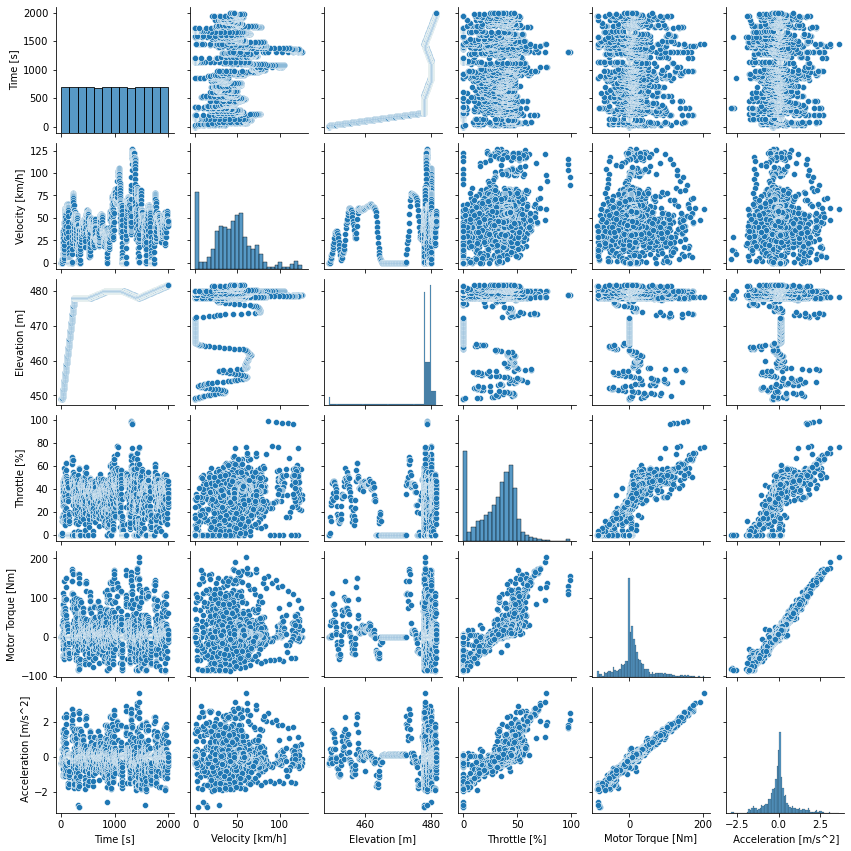

<Figure size 864x864 with 0 Axes>

In [33]:
plot = sns.pairplot(getTrip(0,2000,0,6), height=2.0)
makeImage("MassPlot",plot) # Show pairplot as image

<AxesSubplot:>

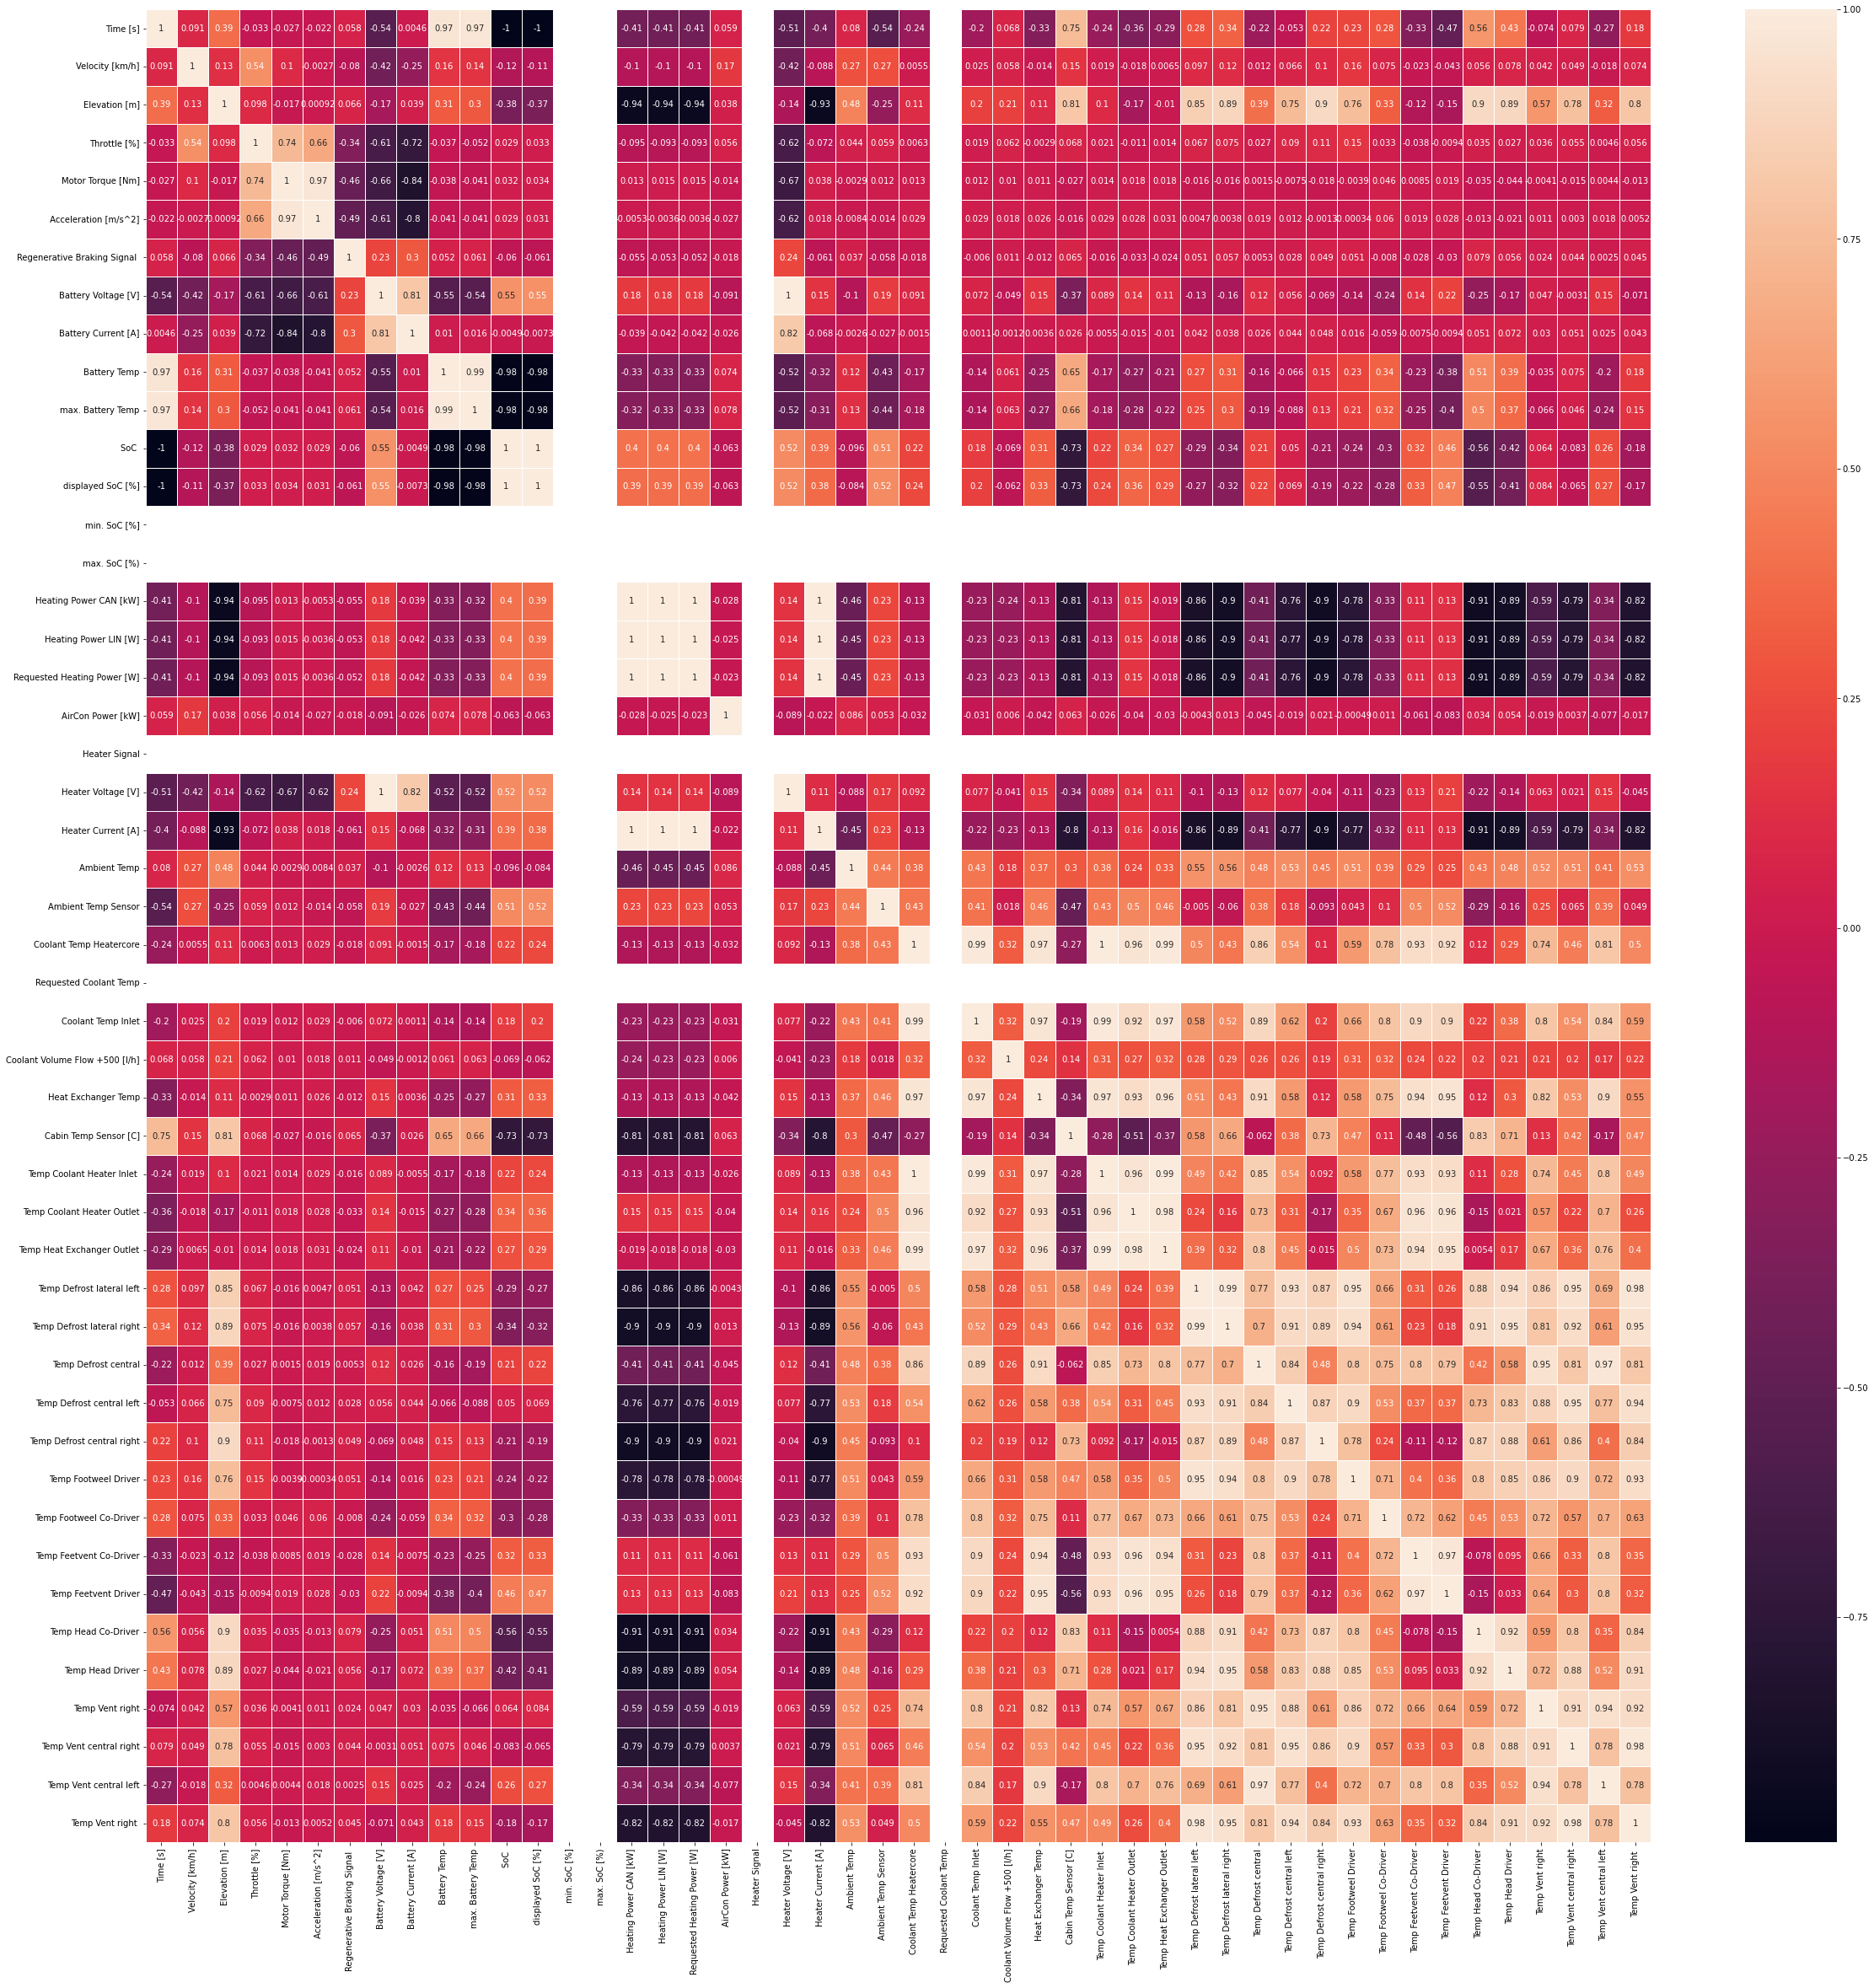

In [34]:
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(trip.corr(), annot=True, linewidths=.5, ax=ax)

We see that we don't see a lot of clear structure/correlation within our dataset.
The next logical thing is to to think about correlations and test them out ourself.

- Time - Battery Heat 1:1
- Battery Voltage - Battery Current -1:1
- Heat of all wheels 1:1


Render Time :0.3s
FilePath: ./savedImages/TimeBatteryHeatPlot.png


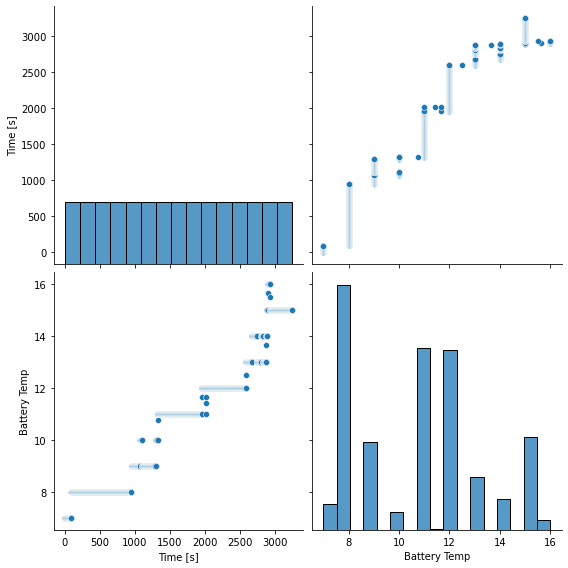

<Figure size 576x576 with 0 Axes>

In [35]:
# Time - Battery Heat

plot = sns.pairplot(trip[['Time [s]', 'Battery Temp']], height=4.0)
makeImage("TimeBatteryHeatPlot",plot) # Show pairplot as image

# Yes there is a correlation between Time and  Battery heat


Render Time :0.41s
FilePath: ./savedImages/BatteryVoltageCurrentPlot.png


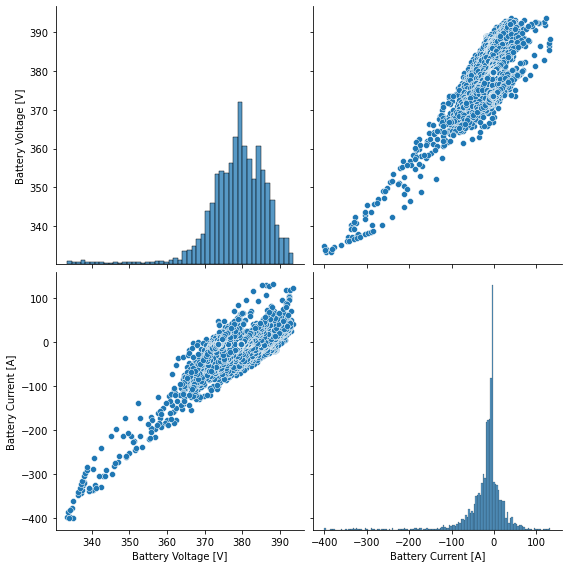

<Figure size 576x576 with 0 Axes>

In [36]:
#Battery Voltage - Battery Current

bv="Battery Voltage [V]"
bc="Battery Current [A]"

plot = sns.pairplot(trip[[bv,bc]], height=4.0)
makeImage("BatteryVoltageCurrentPlot",plot) # Show pairplot as image

# Yes there is a correlation between Time and  Battery heat


NameError: name 'clear' is not defined

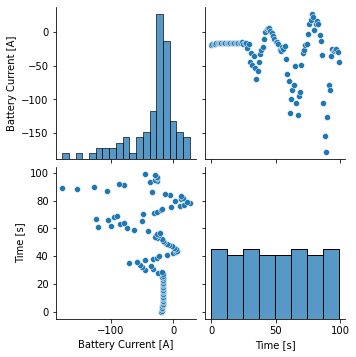

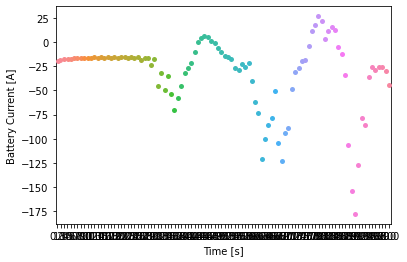

<Figure size 432x288 with 0 Axes>

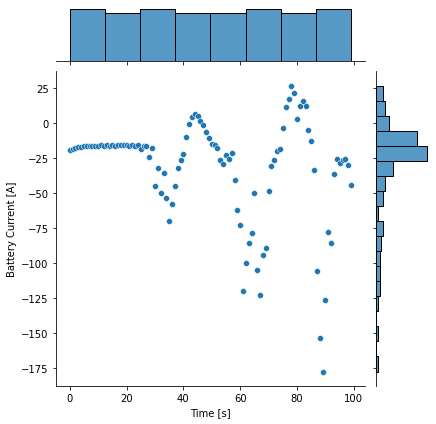

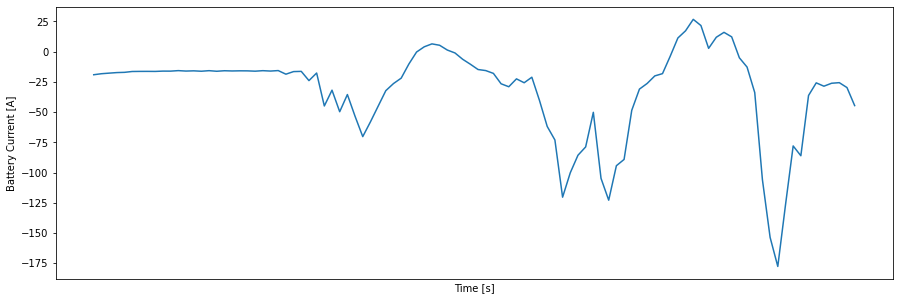

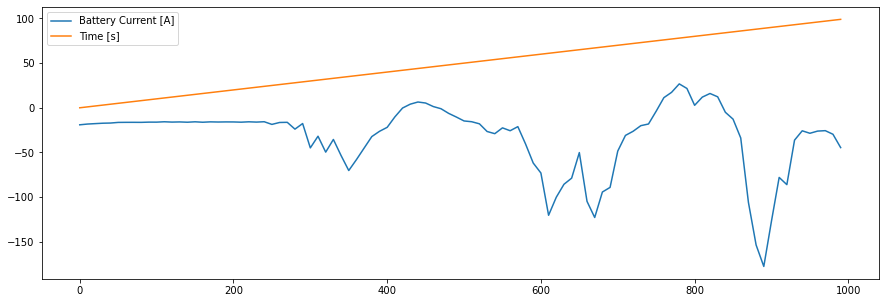

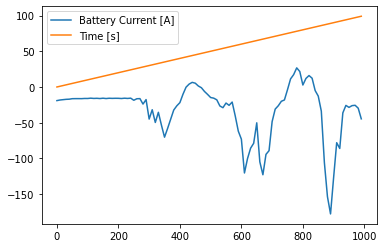

In [46]:
bv="Time [s]"
bc="Battery Current [A]"

def overview(plot,xVal,yVal):
    sns.pairplot(data=plot)
    plt.figure()
    sns.stripplot(data=plot, x=xVal, y=yVal)
    plt.figure()
    sns.jointplot(data=plot, x=xVal, y=yVal)
    plt.figure(figsize=(15,5))
    line_plot = sns.lineplot(data=plot, x=xVal, y=yVal,dashes=False)
    xticks = line_plot.get_xticks()
    line_plot.set_xticks(xticks[::40]);
    plt.figure(figsize=(15,5))
    sns.lineplot(data=plot, dashes=False)
    plt.figure()
    sns.lineplot(data=plot, dashes=False)

overview(smallTrip(0)[[bc,bv]],bv,bc)




In [48]:
clear()